In [5]:
from rootedtrees import *
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [6]:
def f(t, y):
    return [y[2], y[3], -y[0] / ((y[0] ** 2 + y[1] ** 2) ** (3 / 2)), -y[1] / ((y[0] ** 2 + y[1] ** 2) ** (3 / 2))]

y0 = [1,0,0,1]
t0, t_end, n = 0.0, 10.0, 1000

# Explicit Midpoint

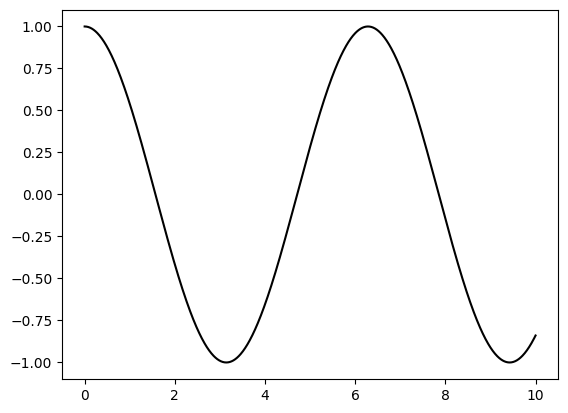

In [17]:
A = [[0,0], [0.5,0]]
b = [0,1]
method = RK(A,b)

t_vals, y_vals = method.run(y0, t0, t_end, f, n, plot = True, plot_dims = [0], plot_kwargs = {"color" : "black"})
plt.show()

# Implicit Midpoint

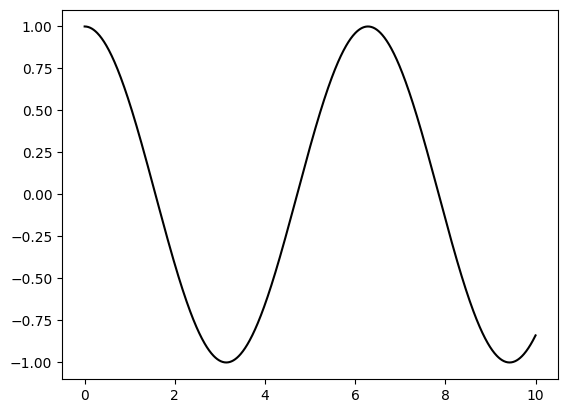

In [13]:
A = [[0.5]]
b = [1]
method = RK(A,b)

t_vals, y_vals = method.run(y0, t0, t_end, f, n, plot = True, plot_dims = [0], plot_kwargs = {"color" : "black"})
plt.show()